총 샘플의 수 : 5572
   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...
총 샘플의 수 : 5169
   v1  count
0   0   4516
1   1    653
메일 본문의 개수: 5169
레이블의 개수: 5169
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u.

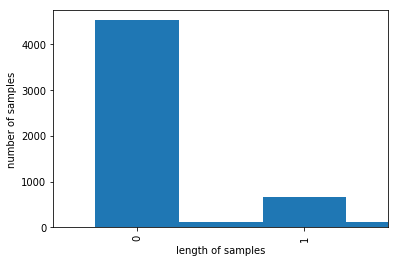

훈련 데이터의 크기(shape):  (5169, 189)
Epoch 1/4
52/52 [==============================] - 2s 31ms/step - loss: 0.2943 - acc: 0.8993 - val_loss: 0.1336 - val_acc: 0.9649
Epoch 2/4
52/52 [==============================] - 1s 28ms/step - loss: 0.1016 - acc: 0.9722 - val_loss: 0.0994 - val_acc: 0.9722
Epoch 3/4
52/52 [==============================] - 1s 28ms/step - loss: 0.0539 - acc: 0.9858 - val_loss: 0.0645 - val_acc: 0.9794
Epoch 4/4
33/33 [==============================] - 0s 5ms/step - loss: 0.0782 - acc: 0.9797

 테스트 정확도: 0.9797


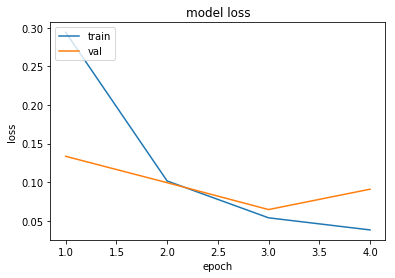

[[139, 13, 103, 708, 1018, 28, 126, 6, 84, 1368, 2, 538, 2, 5, 361, 585, 1019, 36, 416, 12, 53, 17, 5, 103, 538, 274, 53, 19, 13, 103, 708, 1018, 28, 126, 6, 84, 1368, 2, 538, 2, 5, 361, 585, 1019, 36, 416, 12, 53, 17, 5, 103, 538, 274, 53, 19, 4027]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  139   13  103  708 1018   28  126
     6   84 1368    2  538  

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize  

urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1') #다운로드 받은 csv 파일을 Pandas를 이용해 data에 저장

print('총 샘플의 수 :',len(data))

del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
print(data[:5]) #상위 5개 출력
data.isnull().values.any() # null값을 가진 샘플이 있는지
data['v2'].nunique(), data['v1'].nunique() # 중복된 샘플이 있는지 확인
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

print('총 샘플의 수 :',len(data))

data['v1'].value_counts().plot(kind='bar') # 분류 데이터 개수

print(data.groupby('v1').size().reset_index(name='count'))

X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data))) # x, y 데이터 분리

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 x의 각 행에 토큰화를 수행
print(X_data)
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

word_to_index = tokenizer.word_index
#print(word_to_index) # 각 단어가 어떤 정수에 매핑되었는지 확인 (단어의 빈도수가 높을 수록 낮은 정수 매핑)

# 토큰화된 각 단어 index를 json 형태로 저장
import json
json = json.dumps(word_to_index)
with open("wordIndex.json", "w") as f:
    f.write(json)

threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('등장 빈도가 %s 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq)*100)

vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train) # 훈련 : 테스트 = 8 : 2
print('훈련 데이터 개수 :', n_of_train)
print('테스트 데이터 개수 :', n_of_test)

X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max_len = 189 # 전체 데이터 셋 길이 설정 (메일의 최대 길이)
data = pad_sequences(X_data, maxlen = max_len) # 모든 메일의 길이를 189로 설정 (빈 부분은 0으로 패딩)
print('훈련 데이터의 크기(shape): ', data.shape)

X_test = data[n_of_train:]
y_test = np.array(y_data[n_of_train:])
X_train = data[:n_of_train]
y_train = np.array(y_data[:n_of_train]) # 훈련, 테스트 데이터 분류

from tensorflow.keras.layers import SimpleRNN, Embedding ,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) # 32 차원 벡터
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid')) # 이진 분류이므로 시그모이드 함수 사용

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2) # 훈련 데이터의 20%를 검증데이터로 사용

print('\n 테스트 정확도: %.4f' % (model.evaluate(X_test, y_test)[1]))

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() # epochs 5 넘어가는 시점에서 과적합이 시작됨 (손실율 증가)